In [1]:
import sys
sys.path.insert(
    0,
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification"
)

## Input

In [2]:
from pandas import read_csv

In [3]:
train = read_csv(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/Train.csv",
    header="infer"
)

## Load images

In [4]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [5]:
from src.processors import simple_resize, aspect_resize, load_image, extract_patches

In [6]:
img = load_image(
    "/Users/schalappe/Documents/Lab/Engineer/Projects/kenyan_sign_language_classification/data/Images/ImageID_53U91K9F.jpg"
)

Metal device set to: Apple M1 Pro


2022-02-05 17:11:04.565637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-05 17:11:04.565786: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
img_simple_resize = simple_resize(img, 256, 256)
img_aspect_resize = aspect_resize(img, 256, 256)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


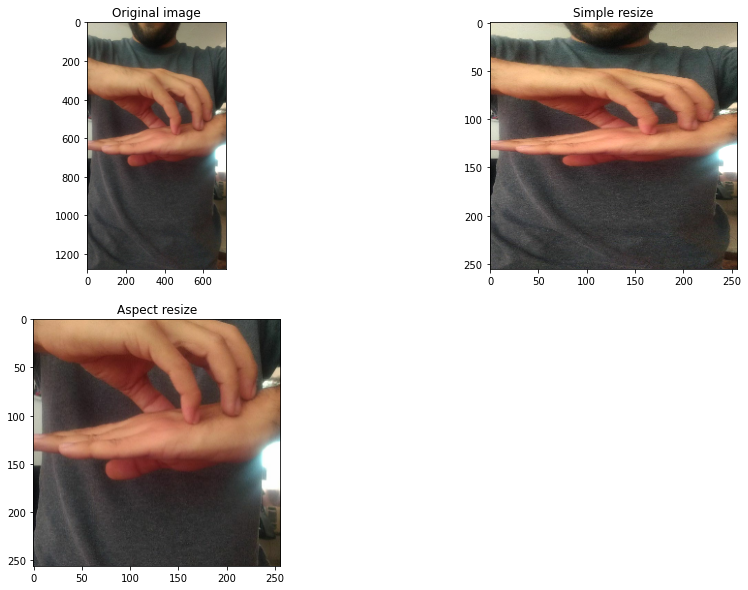

In [8]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax1.title.set_text('Original image')
ax1.imshow(img)

ax2 = fig.add_subplot(222)
ax2.title.set_text('Simple resize')
ax2.imshow(img_simple_resize)

ax3 = fig.add_subplot(223)
ax3.title.set_text('Aspect resize')
ax3.imshow(img_aspect_resize)

plt.show()

In [9]:
patch = extract_patches(img_aspect_resize, 224, 224)

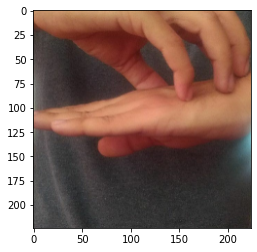

In [10]:
plt.imshow(patch)
plt.show()

## Augmentation

In [69]:
noise = tf.random.normal(shape=tf.shape(patch), mean=0.1, stddev=0.1, dtype=tf.float32)
noise_img = tf.add(patch, noise)
noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)

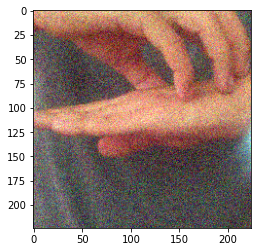

In [70]:
plt.imshow(noise_img)
plt.show()

In [ ]:
plt.imshow(noise_gauss)
plt.show()